In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def bissecaoStep(f,a,b):
    z = (a+b)/2
    if f(z) == 0:
        return (z,z)
    elif f(a)*f(z) < 0:
        return (a,z)
    else:
        return (z,b)

def bissection(f, a, b, tol=1e-6, i=0):
    if (b-a) < tol:
        if abs(f((b+a)/2)) < abs(f(b)) and abs(f((b+a)/2)) < abs(f(a)):
            retv = (b+a)/2
        elif abs(f(b)) < abs(f(a)):
            retv = b
        else:
            retv = a
        return retv
    else:
        a, b = bissecaoStep(f, a, b)
        i += 1
        return bissection(f, a, b, tol, i)
    
def eulerExplicito(F, t0, y0, ts):
    """Calcula uma solução aproximada da equação y' = F(t,y) pelo método de Euler, nos pontos [ts]."""
    ys = [y0]
    t = t0
    for tnext in ts:
        ynext = ys[-1] + F(t, ys[-1])*(tnext-t)
        ys.append(ynext)
        t = tnext
    return ys

def euler_npts(F, I, y0, npts, retpts=False):
    if retpts:
        ts, h = np.linspace(I[0], I[-1], num = npts, retstep = True)
    else:
        ts = np.linspace(I[0], I[-1], num = npts)
    ys = eulerExplicito(F, I[0], y0, ts[1:])
    if retpts:
        return ts, ys
    else:
        return ys    

# Resolvendo a equação implícita

Vejamos o que acontece quando tentamos resolver a EDO
$$ y'(t) = t - \cos(y) $$

pelo método de Euler implícito.
Agora, temos que resolver a equação (**implícita!**) em $dy$:

$$dy = (t - \cos(y + dy))h.$$

Como fazer para encontrar uma solução?

# Vamos por partes

Como sempre!

1. Uma função para resolver a equação
2. Incorporar esta função dentro do método de Euler
3. Generalizando, depois.

In [45]:
def solve_dy(t, y, h):
    """Resolve a equação implícita dy = th - cos(y+dy)*h."""
    ### Resposta aqui
    def aux(dy):
        return dy - t*h + h*np.cos(y+dy)
    return bissection(aux, 0, t*h-h*np.cos(y))


In [61]:
solve_dy(0, 1, 0.1)

-0.05403023058681398

In [62]:
solve_dy(0, 1, 0.3)

-0.1620906917604419

In [48]:
# Copiar o código da aula Euler implicit, e modificar
# Dados
T = 5
npts = 30
y0 = 1

# 1
ts, h = np.linspace(0, T, num=npts, retstep=True)

# 2
### Resposta aqui
ys = [y0]
for tnext in ts[1:]:
    yt = ys[-1]
    ynext = yt + solve_dy(tnext, yt, h)
    ys.append(ynext)

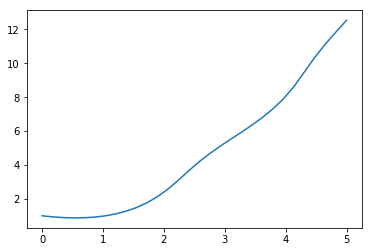

In [49]:
plt.plot(ts, ys)
plt.show()

Comparando com o método explícito

In [63]:
def G(t,y):
    return t - np.cos(y)

In [64]:
ts_expl, ys_expl = euler(G, [0,5], 1, npts=30, retpts=True)

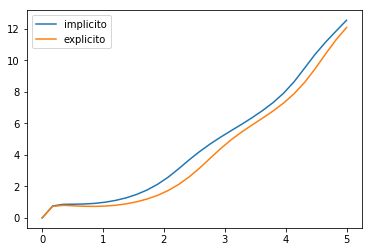

In [65]:
plt.plot(ts, ys - np.exp(-10*ts), label='implicito')
plt.plot(ts_expl, ys_expl - np.exp(-10*ts_expl), label='explicito')
plt.legend()
plt.show()

E agora, quem está certo?  (ou _menos errado_...)

In [66]:
ts_expl, ys_expl = euler_npts(G, [0,5], 1, npts=300, retpts=True)

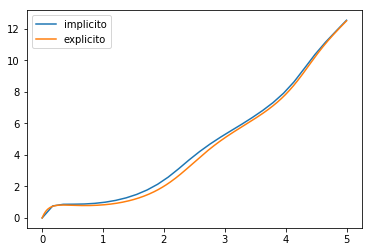

In [67]:
plt.plot(ts, ys - np.exp(-10*ts), label='implicito')
plt.plot(ts_expl, ys_expl - np.exp(-10*ts_expl), label='explicito')
plt.legend()
plt.show()

# Passando para uma função

Temos que resolver, a cada etapa, a equação

$$ y(t_{i+1}) = y(t_i) + F(t_{i+1}, y(t_{i+1})) (t_{i+1} - t_i), $$

dados $y(t_i)$, $t_{i+1}$ e $t_i$.

Re-escrevendo em função dos passos:

$$ \delta y = F(t_{i+1}, y + \delta y) h.$$

Assim, precisamos de uma função que retorne $\delta y$, dados $y(t_i)$, $t_{i+1}$ e $h$.

### Gerando a função `solveF` numericamente.

Agora, não vamos ter uma fórmula fechada, e precisamos fabricar `solve_dy` dada a função $F$.

In [58]:
def generate_solveF(F):
    t = 1
    n = 30
    h = t*n
    y = euler_npts(F, t, 1, npts=n, retpts = False)
    def solveF(t, y, h):
        # Bisseção abaixo
        ### Resposta aqui
        
        return bissection(F, 0, euler_npts(F, t, 1, npts=30, retpts = False)) 
    return solveF

In [59]:
# Copiar o código de eulerimplicit, e modificar
# Explicar porque devemos passar solveF
def implicit_euler(F, t0, y0, ts):
    """Calcula uma solução aproximada da equação y' = F(t,y) pelo método de Euler implícito, nos pontos [ts].
    A função solveF(t,y,h) dá a solução de dy = F(t,y+dy)*h."""
    solveF = generate_solveF(F)
    ### Resposta aqui
    T = 5
    npts = 30
    y0 = 1
    # 1
    ts, h = np.linspace(0, T, num=npts, retstep=True)
    # 2
    ### Resposta aqui
    ys = [y0]
    for tnext in ts[1:]:
        yt = ys[-1]
        ynext = yt + solve_dy(tnext, yt, h)
        ys.append(ynext)

In [60]:
# Fazer o gráfico para 30 e 300 pontos, e comparar com Euler_explicito com 1000 pontos
### Resposta aqui

plt.plot(t, ys, label="30")

plt.legend()
plt.title("Solução")
plt.show()

NameError: name 't' is not defined

# Mais uma dificuldade...

Será que realmente estamos encontrando uma raiz da equação ao usar a bisseção?
Inclua um `assert` de que há de fato uma raiz testando sinais opostos.

In [17]:
def generate_solveF(F):
    def solveF(t, y, h):
        # Bisseção abaixo
        ### Resposta aqui

    return solveF

In [14]:
ts = np.linspace(0,5,num=30)
ys = implicit_euler(G, 0, 1, ts[1:])

NameError: name 'G' is not defined

Vamos tentar "dar um pouco mais de margem", com o dobro do passo:

In [19]:
def generate_solveF(F):
    def solveF(t, y, h):
        # Bisseção abaixo
        ### Resposta aqui

    return solveF

In [20]:
ts = np.linspace(0,5,num=30)
ys = implicit_euler(G, 0, 1, ts[1:])

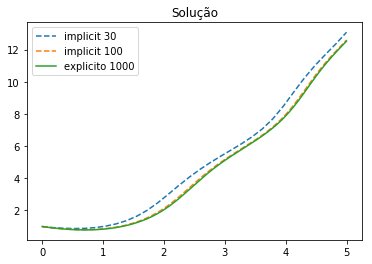

In [21]:
# Fazer o gráfico para 30 e 300 pontos, e comparar com Euler_explicito com 1000 pontos
### Resposta aqui

plt.legend()
plt.title("Solução")
plt.show()